In [1]:
# %gui qt
import numpy as np
import mne
import pickle
import sys
import os
# import matplotlib

import matplotlib.pyplot as plt

# import vispy
# print(vispy.sys_info())
# BASE_DIR = os.path.dirname(os.path.dirname(os.path.abspath(__file__)))
# sys.path.append(BASE_DIR)
%matplotlib inline
mne.utils.set_config('MNE_USE_CUDA', 'true')  
mne.cuda.init_cuda(verbose=True)

Now using CUDA device 0
Enabling CUDA with 6.64 GB available memory


In [2]:
#Load transformed data from saved file into list
data=pickle.load(open('pickled/OpenBCISession_2020-02-14_11-09-00-SEVEN', 'rb'))

In [3]:
#Naming system for blocks into integers
bloc={
    "sync":1,
    "baseline":2,
    "stressor":3,
    "survey":4,
    "rest":5,
    "slowBreath":6,
    "paced":7
}

def createMNEObj(data, name='Empty'):
    #Create Metadata
    
    sampling_rate = 125
    channel_names = ['Fp1', 'Fp2', 'C3', 'C4', 'P7', 'P8', 'O1', 'O2', 'F7', 'F8', 'F3', 'F4', 'T7', 'T8', 'P3', 'P4',
                    'time', 'bpm', 'ibi', 'sdnn', 'sdsd', 'rmssd', 'pnn20', 'pnn50', 'hr_mad', 'sd1', 'sd2', 's', 'sd1/sd2', 'breathingrate', 'segment_indices1', 'segment_indices2', 'block']
    channel_types = ['eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
                     'misc', 'misc', 'misc', 'misc', 'misc', 'misc', 'misc', 'misc', 'misc', 'misc', 'misc', 'misc', 'misc', 'misc', 'misc', 'misc', 'stim']
    n_channels = len(channel_types)
    info = mne.create_info(ch_names=channel_names, sfreq=sampling_rate, ch_types=channel_types)
    info['description'] = name
    print(info)
    transformed = []
    start=-1.0
    
    for i in range(len(data)):
        add=[]
        add=data[i][1:17]
#         print(data[i][19].keys())
        if start==-1:
            start=data[i][18].hour*3600 + data[i][18].minute*60 + data[i][18].second + data[i][18].microsecond/1000
            add.append(0.0)
        else:
            tim=data[i][18].hour*3600 + data[i][18].minute*60 + data[i][18].second + data[i][18].microsecond/1000
            add.append(tim-start)
#         add.append(str(data[i][18].hour)+':'+str(data[i][18].minute)+':'+str(data[i][18].second)+':'+str(int(data[i][18].microsecond/1000)))
#         try:
        add.append(data[i][19]['bpm'])
#         except Exception as e: 
#             print(e, i)
#             print(data[i][19])
#             print(len(data))
        
        add.append(data[i][19]['ibi'])
        add.append(data[i][19]['sdnn'])
        add.append(data[i][19]['sdsd'])
        add.append(data[i][19]['rmssd'])
        add.append(data[i][19]['pnn20'])
        add.append(data[i][19]['pnn50'])
        add.append(data[i][19]['hr_mad'])
        add.append(data[i][19]['sd1'])
        add.append(data[i][19]['sd2'])
        add.append(data[i][19]['s'])
        add.append(data[i][19]['sd1/sd2'])
        add.append(data[i][19]['breathingrate'])
        add.append(data[i][19]['segment_indices'][0])
        add.append(data[i][19]['segment_indices'][1])
        add.append(bloc[data[i][20]])
        transformed.append(np.array(add))
    
    transformed=np.array(transformed)
    print(transformed[0])
    #have to convert rows to columns to fit MNE structure
    transformed=transformed.transpose()
    print(transformed[0], transformed[1], transformed[2], transformed[3])
    print(len(transformed[0]))
    loaded=mne.io.RawArray(transformed, info)
    return loaded

In [38]:
raw=createMNEObj(data)
# raw.filter(0.5, 55, fir_design='firwin')


<ipython-input-3-f7810211a598>:21: RuntimeWarning: 2 channel names are too long, have been truncated to 15 characters:
['segment_indices1', 'segment_indices2']
  info = mne.create_info(ch_names=channel_names, sfreq=sampling_rate, ch_types=channel_types)
<ipython-input-3-f7810211a598>:21: RuntimeWarning: Channel names are not unique, found duplicates for: {'segment_indices'}. Applying running numbers for duplicates.
  info = mne.create_info(ch_names=channel_names, sfreq=sampling_rate, ch_types=channel_types)
/home/sean/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: UserWarning: Warning: converting a masked element to nan.


<Info | 17 non-empty fields
    bads : list | 0 items
    ch_names : list | Fp1, Fp2, C3, C4, P7, P8, O1, O2, F7, ...
    chs : list | 33 items (EEG: 16, MISC: 16, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    description : str | 5 items
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 62.5 Hz
    meas_date : NoneType | unspecified
    nchan : int | 33
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 125.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    dev_ctf_t : NoneType
    device_info : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    helium_info : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_nam

In [5]:
# montage = mne.channels.read_custom_montage('./cap.txt')
montage = mne.channels.make_standard_montage('easycap-M1')

In [6]:
raw.set_montage(montage, raise_if_subset=False)

DigMontage is a superset of info. 58 in DigMontage will be ignored. The ignored channels are: {'PO4', 'FC4', 'FT7', 'PO7', 'F1', 'AF3', 'F9', 'F5', 'CP2', 'FT10', 'AF4', 'Pz', 'P2', 'FC2', 'PO3', 'AF8', 'Oz', 'AFz', 'FT9', 'Fz', 'PO8', 'FC1', 'FC5', 'C1', 'P10', 'Cz', 'FC3', 'O9', 'Iz', 'AF7', 'PO9', 'F2', 'TP10', 'PO10', 'O10', 'P1', 'F10', 'CP5', 'CP4', 'POz', 'F6', 'TP8', 'C6', 'TP7', 'CP6', 'FT8', 'FC6', 'TP9', 'CP1', 'CPz', 'P6', 'FCz', 'P5', 'C2', 'C5', 'Fpz', 'P9', 'CP3'}


<RawArray  |  None, n_channels x n_times : 33 x 201227 (1609.8 sec), ~50.7 MB, data loaded>

In [7]:
layout = mne.channels.read_layout('cap', path='./')
# layout.plot()  # same result as: mne.viz.plot_layout(biosemi_layout)

In [51]:
data[0]

[20,
 17560.07,
 17216.7,
 5152.75,
 2391.03,
 4140.66,
 4405.57,
 3411.7,
 228.32,
 6237.81,
 1431.67,
 13483.02,
 -9154.36,
 5237.44,
 8030.2,
 8008.45,
 1521.39,
 510,
 datetime.datetime(1900, 1, 1, 11, 10, 20, 642000),
 {'bpm': 104.95156081808395,
  'ibi': 571.6923076923077,
  'sdnn': 206.25577273614002,
  'sdsd': 165.80577660490468,
  'rmssd': 358.03910400960393,
  'pnn20': 0.8888888888888888,
  'pnn50': 0.7777777777777778,
  'hr_mad': 96.0,
  'sd1': 252.10148847999125,
  'sd2': 172.4650617686498,
  's': 136592.36068328033,
  'sd1/sd2': 1.4617539685699839,
  'breathingrate': 0.13455328310010764,
  'segment_indices': (0, 1875)},
 'sync']

In [50]:
raw[0][0][0][0]

-1.0658141036401503e-14

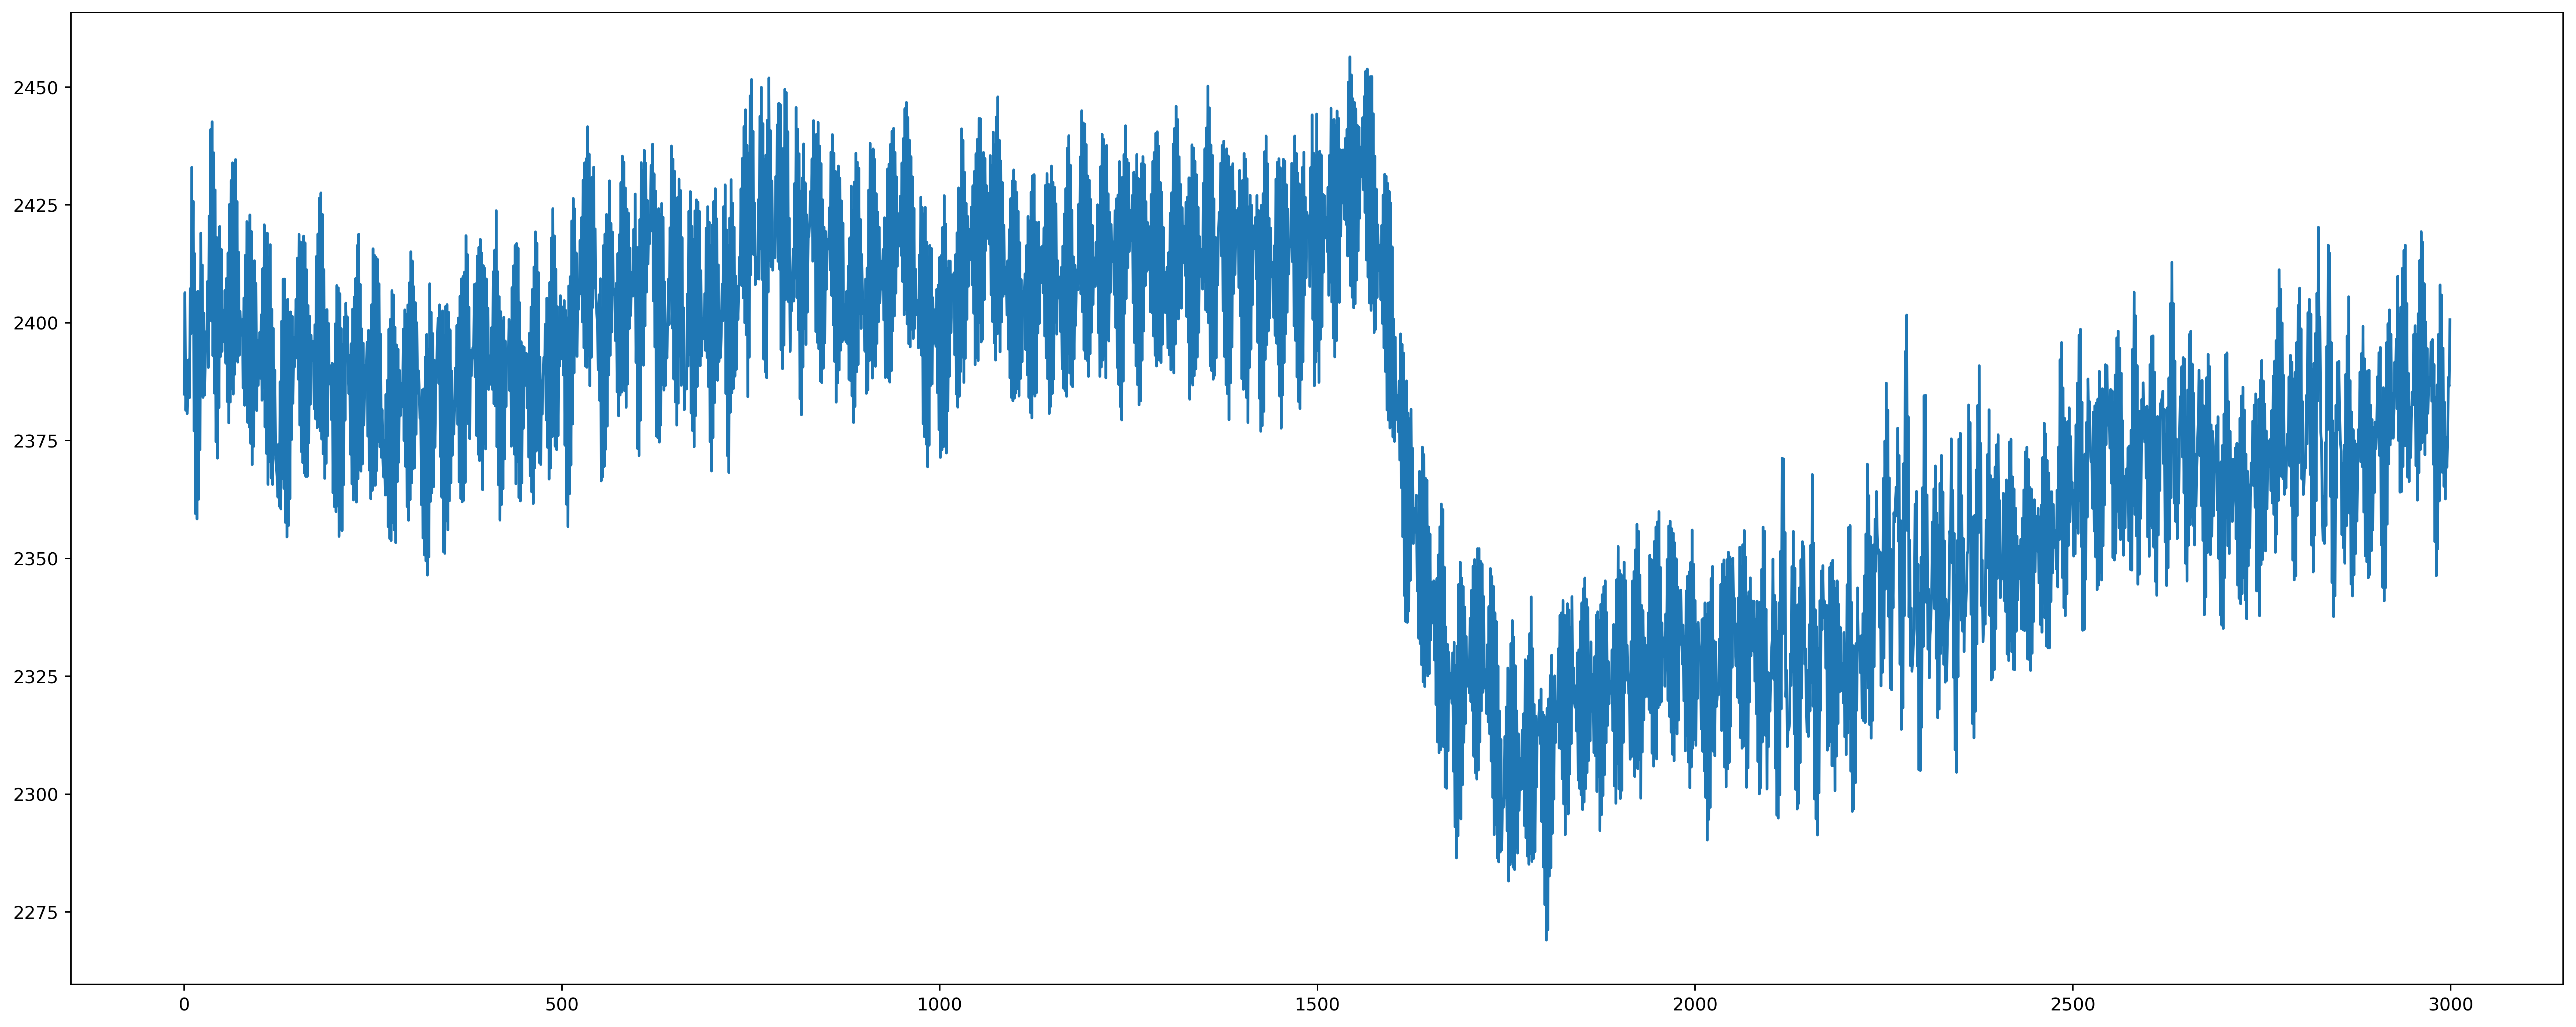

In [39]:
plt.figure(figsize=(25,10), dpi=350)
plt.plot(raw[3][0][0][1000:4000])

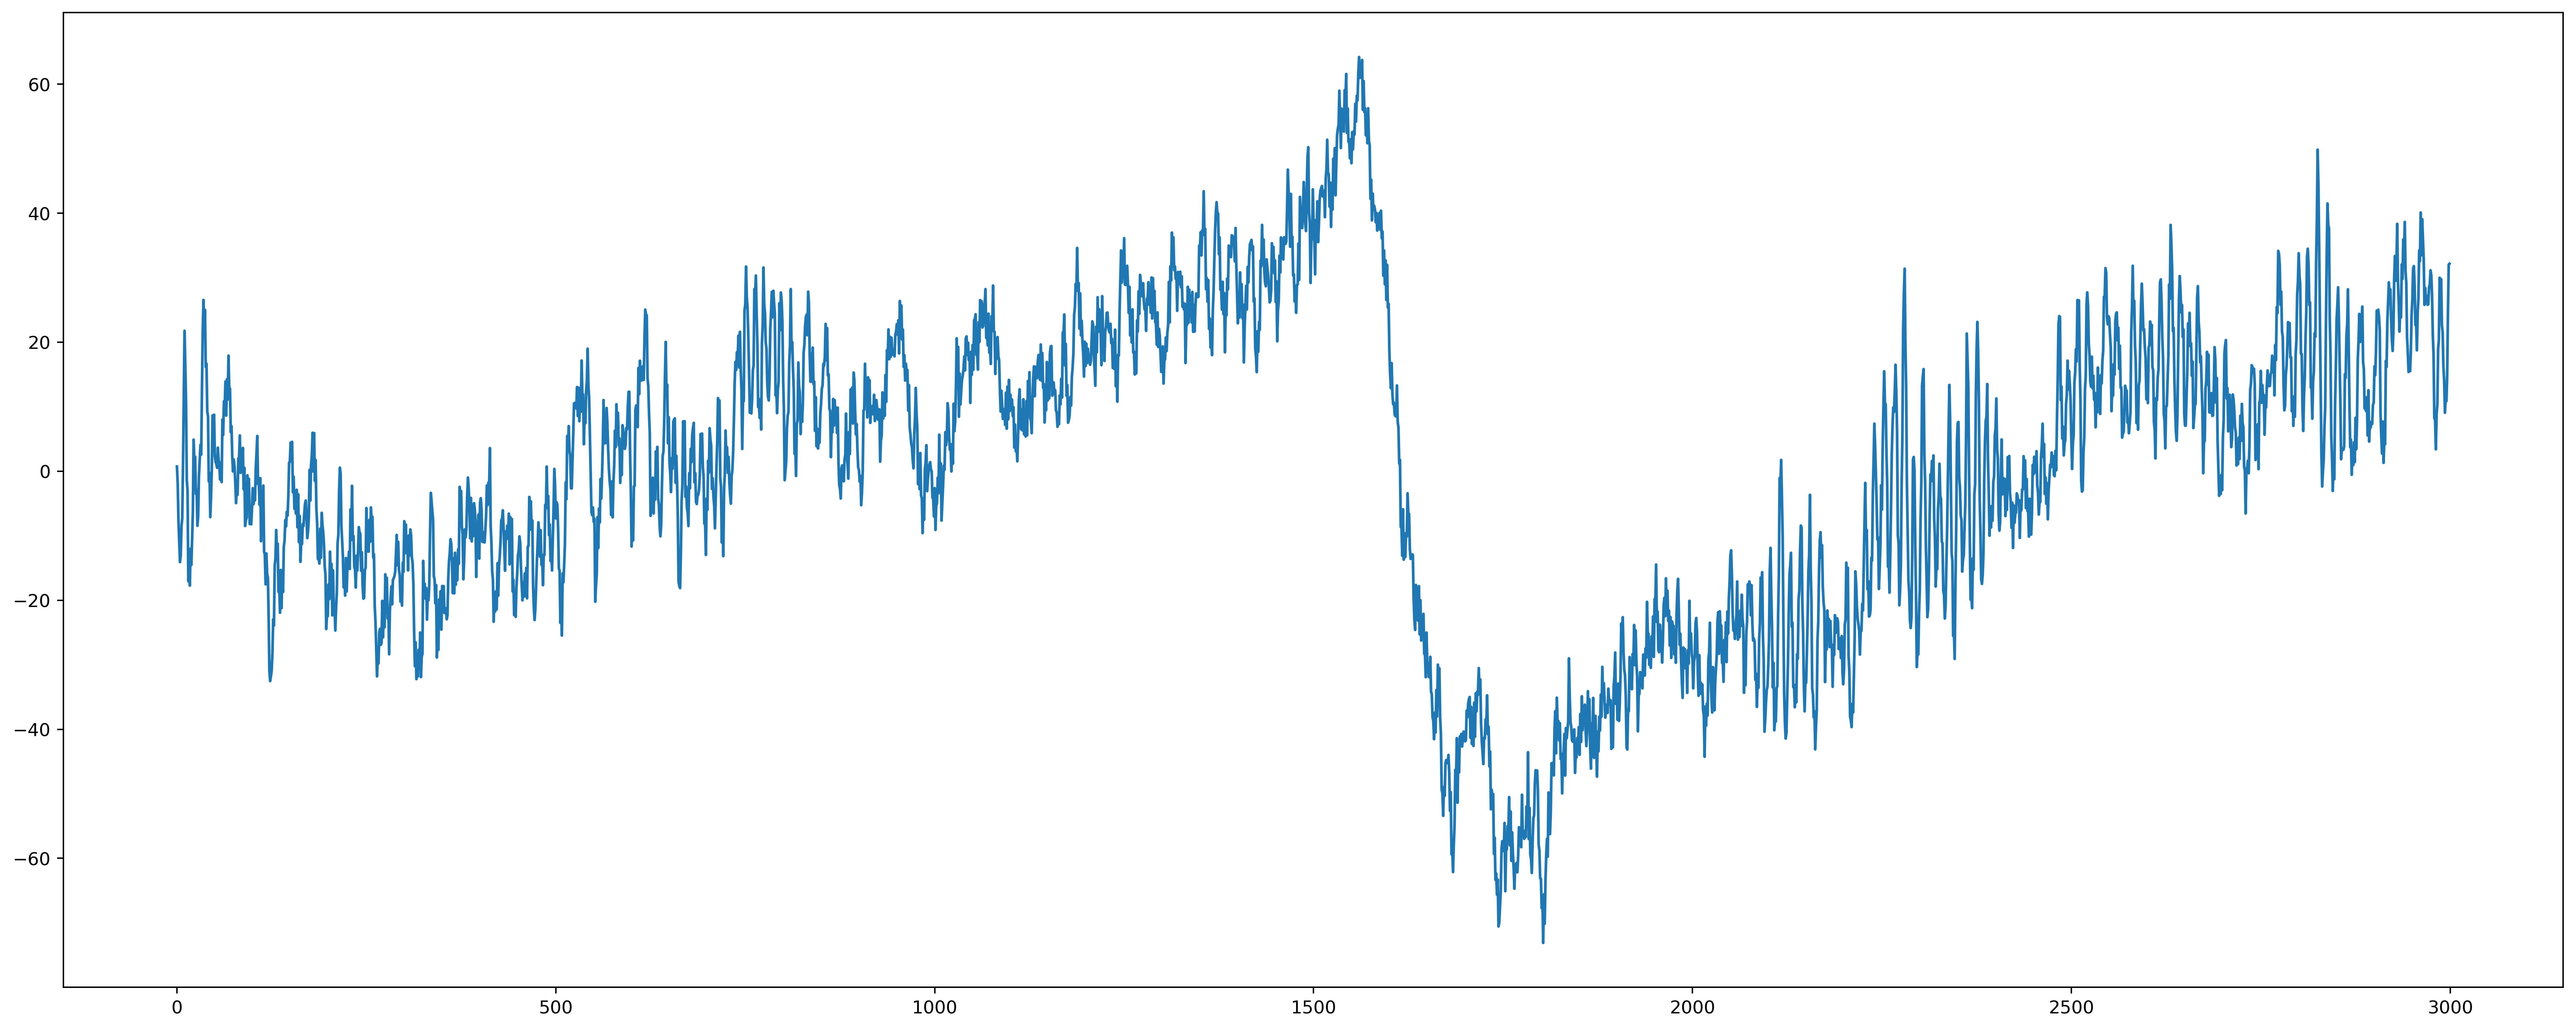

In [41]:
plt.figure(figsize=(25,10), dpi=350)
plt.plot(raw[3][0][0][1000:4000])

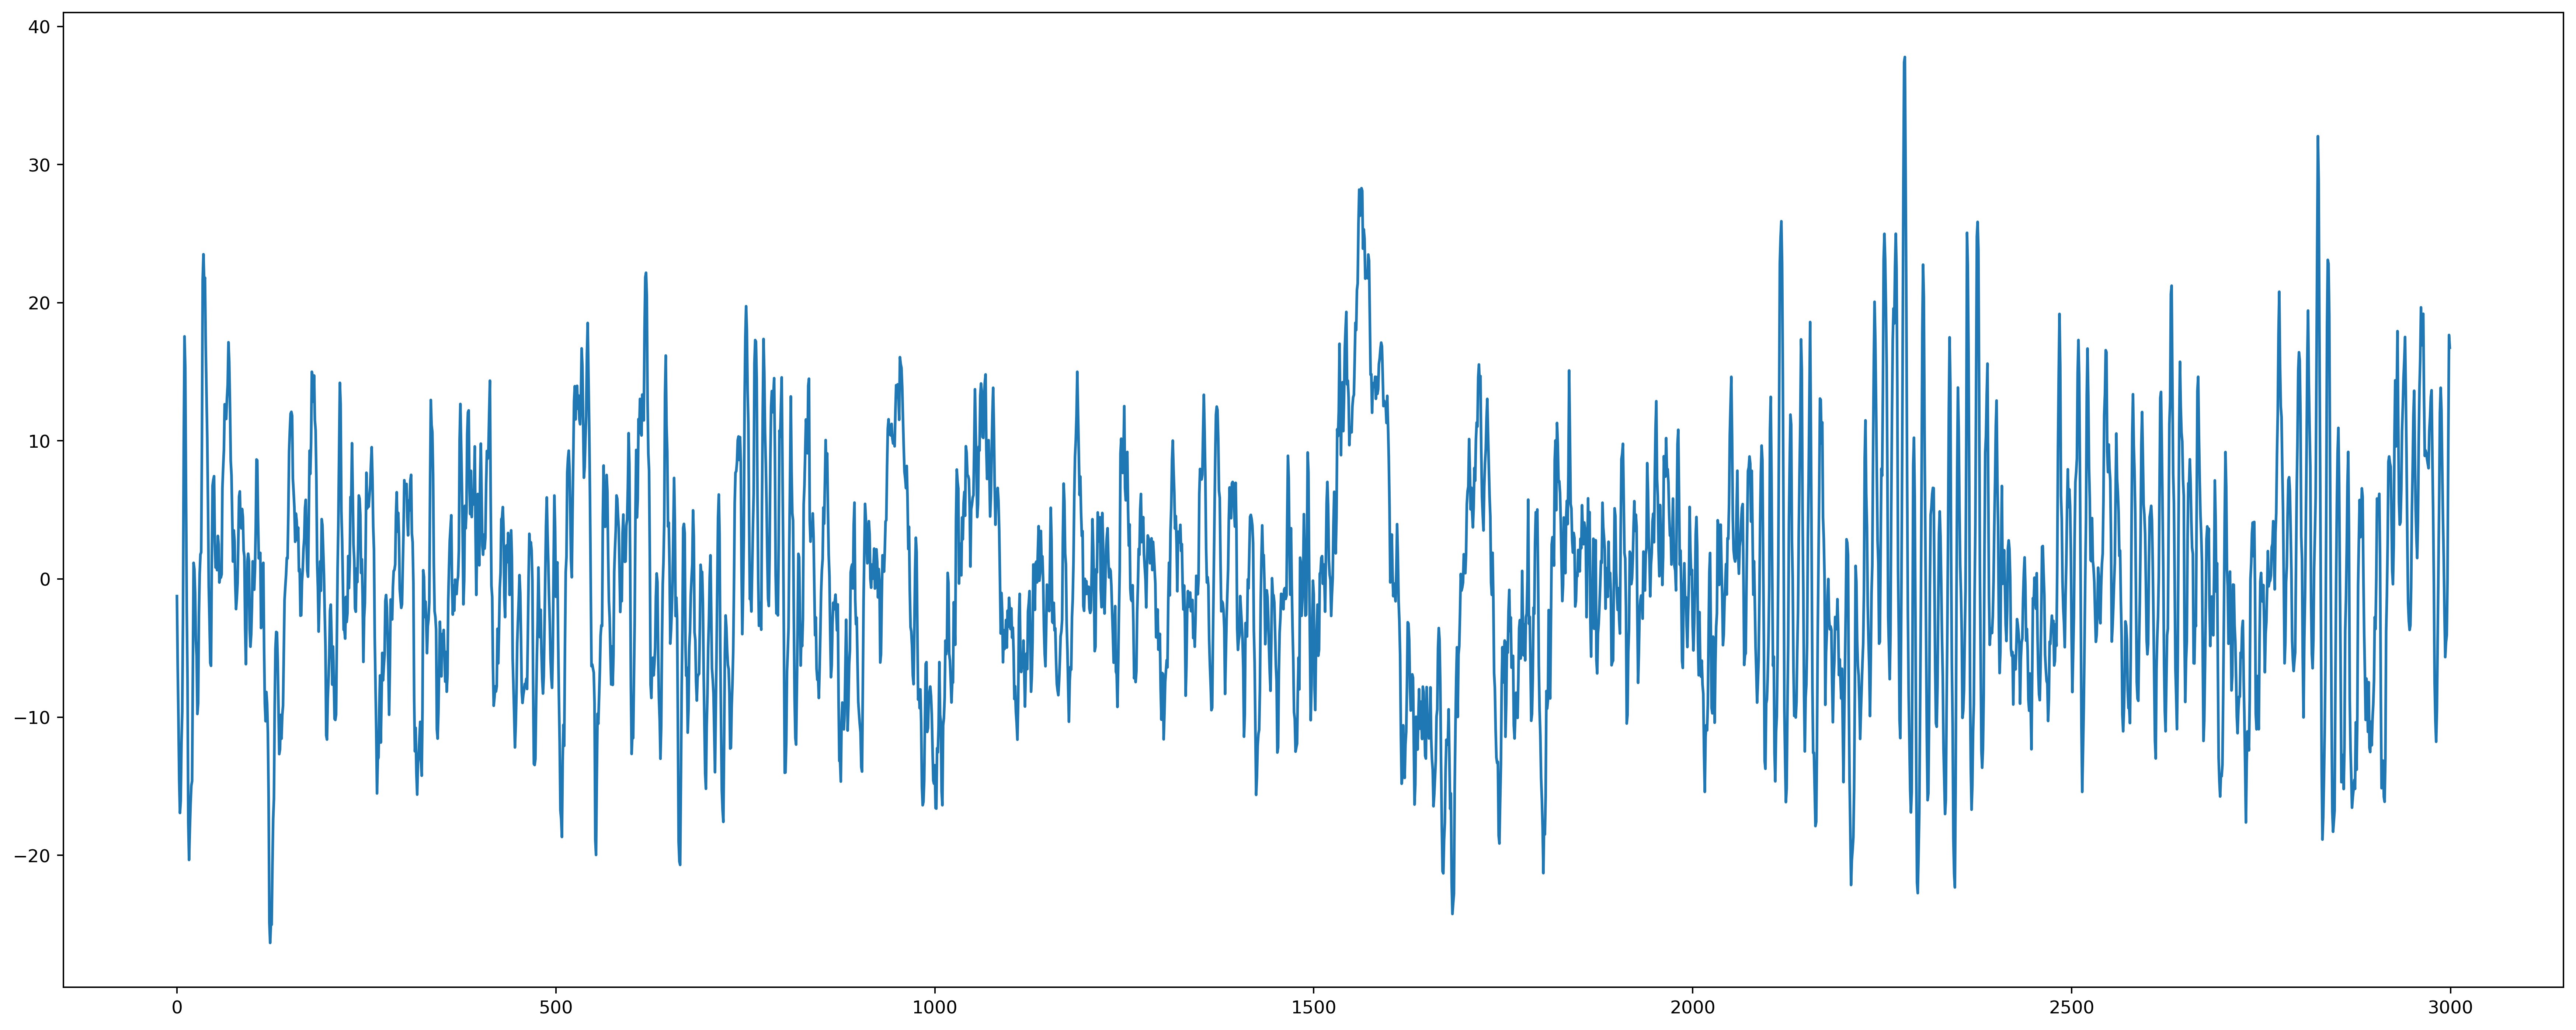

In [43]:
plt.figure(figsize=(25,10), dpi=350)
plt.plot(raw[3][0][0][1000:4000])

In [13]:
out=mne.time_frequency.psd_welch(raw, fmin=5, fmax=7)

Effective window size : 2.048 (s)


In [12]:
out

(array([[2853.10987567, 1744.71753542, 1906.57989908, ..., 1232.12518482,
         1020.08924696, 1227.06009027],
        [1855.45854979, 1643.73701239, 1877.07111541, ...,  975.01833137,
          658.87244271,  700.89047462],
        [ 396.84069325,  325.39274146,  289.6598632 , ...,  185.5873102 ,
          166.47000428,  228.63915532],
        ...,
        [1101.2999404 , 1059.00915514, 1126.36911234, ...,  436.51950041,
          527.67293678,  588.33175469],
        [ 649.42496981,  641.12610104,  642.94659692, ...,  489.91246351,
          492.45552893,  447.85193092],
        [ 590.6057546 ,  535.34240192,  539.49327727, ...,  310.15574774,
          244.73844666,  257.05082528]]),
 array([5.00057149, 5.00119268, 5.00181387, ..., 6.99831534, 6.99893652,
        6.99955771]))

In [14]:
out

(array([[20.93282112, 18.77912128, 18.48274349, 15.85290101],
        [18.58218296, 17.19694207, 17.81533301, 14.86950452],
        [ 3.74416084,  3.12442905,  2.87990792,  2.49371799],
        [ 4.50405611,  2.95323119,  2.71983421,  2.52951162],
        [12.87178063,  8.13443346,  7.15892866,  6.18554438],
        [14.57480985,  8.0481864 ,  7.57756621,  6.65103571],
        [20.57802092,  8.24429127,  6.49844575,  6.03797424],
        [21.05544916,  8.38937984,  6.86361551,  6.22141023],
        [14.15791873, 11.6206244 , 11.41835758,  9.02392917],
        [13.09558093, 10.34452428,  9.77881578,  8.55671857],
        [10.96247571,  8.15645322,  8.53105111,  8.49726472],
        [ 9.68340579,  7.04934245,  6.66317646,  6.57808942],
        [ 9.84958676,  8.46856377,  8.41471134,  6.63947809],
        [ 9.73763953,  8.46512709,  8.2348244 ,  7.59377583],
        [ 7.98915385,  3.41891169,  2.77351953,  2.37293174],
        [ 9.92844546,  3.46312655,  2.76983059,  2.54298921]]),
 array

In [42]:
mne.io.Raw.filter(raw,l_freq=1,h_freq=50)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 413 samples (3.304 sec)



<RawArray  |  None, n_channels x n_times : 33 x 201227 (1609.8 sec), ~50.7 MB, data loaded>

Effective window size : 10.008 (s)


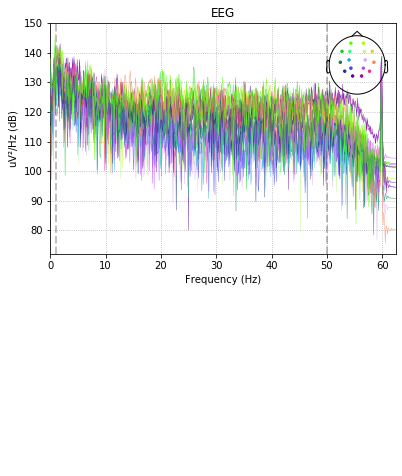

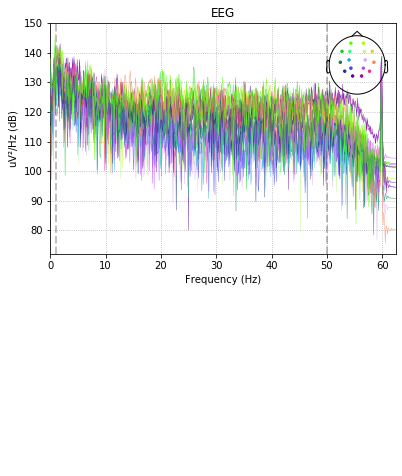

In [13]:
raw.plot_psd(tmin=0, tmax=10)

Effective window size : 10.008 (s)


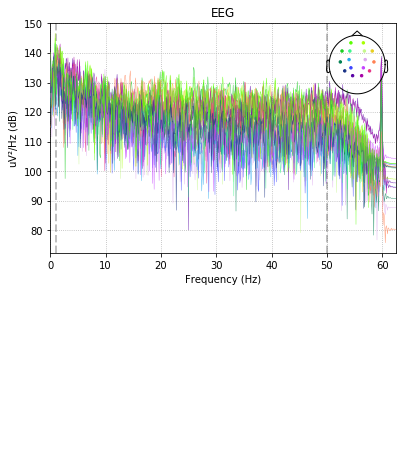

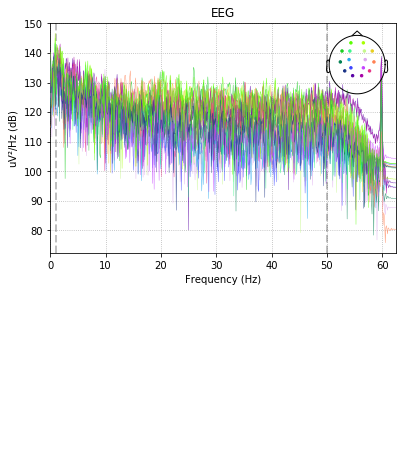

In [16]:
raw.plot_psd(tmin=0, tmax=10)

Effective window size : 16.384 (s)


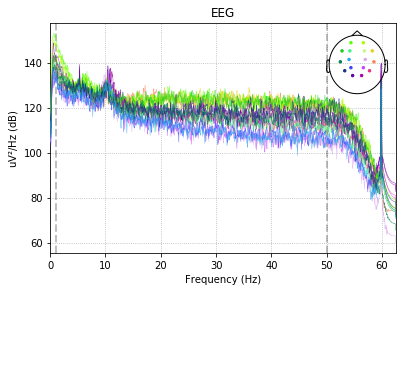

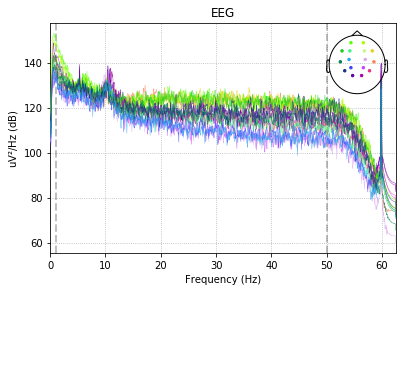

In [17]:
raw.plot_psd(tmin=6, tmax=120)

Effective window size : 16.384 (s)


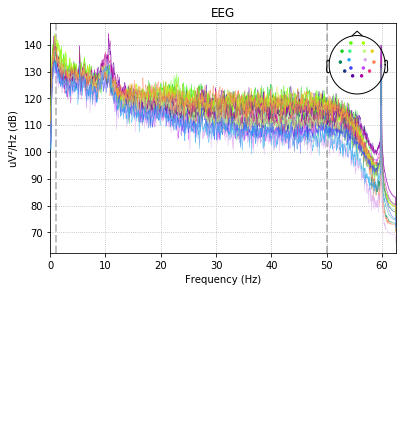

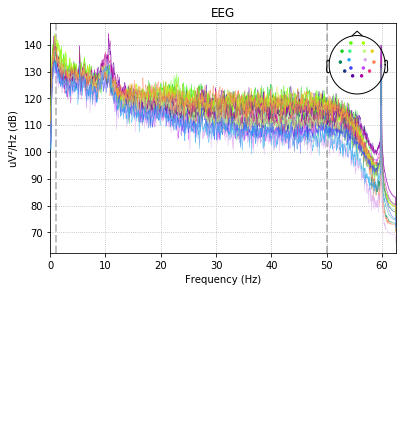

In [18]:
raw.plot_psd(tmin=126, tmax=216)

Effective window size : 16.384 (s)


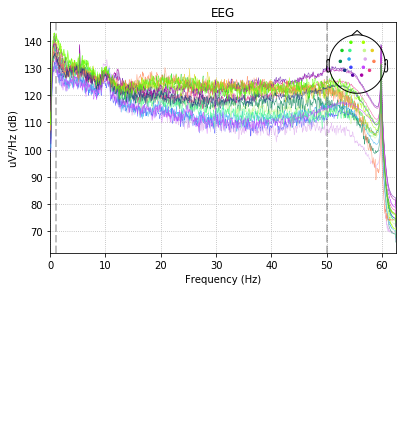

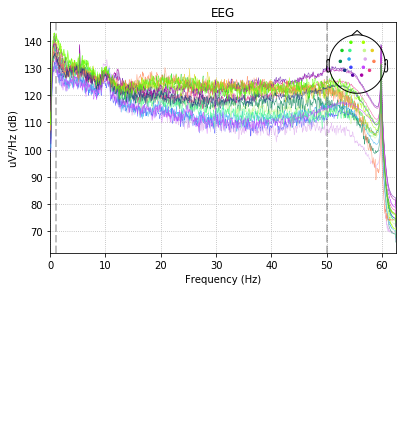

In [19]:
raw.plot_psd(tmin=256, tmax=456)

In [47]:
raw[32][0]

array([[1., 1., 1., ..., 5., 5., 5.]])

In [56]:
def RawtoEvents(data):
    analyze=data[32][0][0]
    events=[]
    print(len(analyze))
    for i in range(1, len(analyze)):
        if analyze[i]!=analyze[i-1]:
            events.append(np.array([int(i), int(analyze[i-1]), int(analyze[i])]))
    return np.array(events)
RawtoEvents(raw)

201227


array([[   781,      1,      2],
       [ 15808,      2,      3],
       [ 27080,      3,      4],
       [ 28343,      4,      5],
       [ 32127,      5,      6],
       [ 57171,      6,      4],
       [ 58433,      4,      5],
       [ 62161,      5,      3],
       [ 73433,      3,      4],
       [ 74696,      4,      5],
       [ 78483,      5,      7],
       [103519,      7,      4],
       [104781,      4,      5],
       [108546,      5,      3],
       [119814,      3,      4],
       [121077,      4,      5],
       [124805,      5,      6],
       [149875,      6,      4],
       [151157,      4,      5],
       [154912,      5,      3],
       [166148,      3,      4],
       [167411,      4,      5],
       [171165,      5,      7],
       [196215,      7,      4],
       [197477,      4,      5]])

In [60]:
epochs = mne.Epochs(raw, RawtoEvents(raw))

201227
25 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


Loading data for 25 events and 88 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows


<ipython-input-70-697022bd73f1>:1: DeprecationWarning: spatial_colors defaults to False in 0.19 but will change to True in 0.20. Set it explicitly to avoid this warning.
  epochs.plot_psd()
<ipython-input-70-697022bd73f1>:1: DeprecationWarning: average defaults to True in 0.19 but will change to False in 0.20. Set it explicitly to avoid this warning.
  epochs.plot_psd()


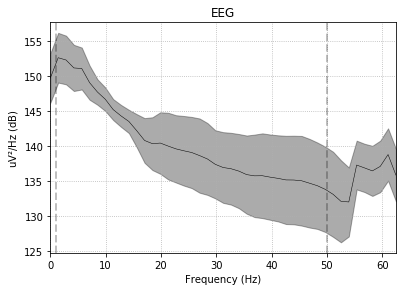

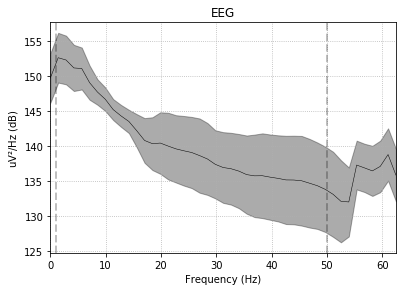

In [70]:
epochs.plot_psd()

/home/sean/anaconda3/lib/python3.7/site-packages/mne/viz/utils.py:1830: RuntimeWarning: invalid value encountered in subtract
  this_data -= this_data.mean(0)  # subtract segment means
/home/sean/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


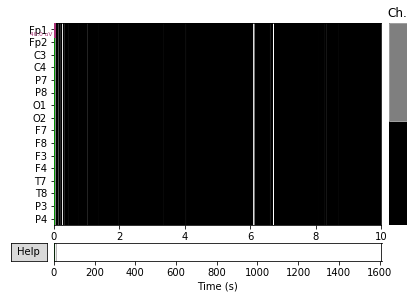

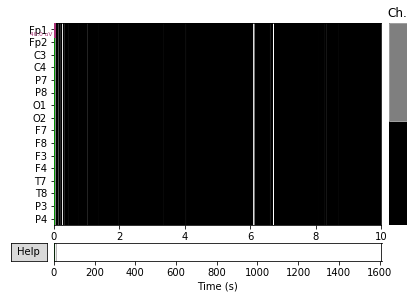

In [59]:
# picks = mne.pick_channels_regexp(raw.ch_names, regexp='EEG 05.')
raw.plot(duration=10.0, start=0.0, n_channels=16)

In [14]:
picks = mne.pick_channels_regexp(raw.ch_names, regexp='C')
print(picks)

[2, 3]


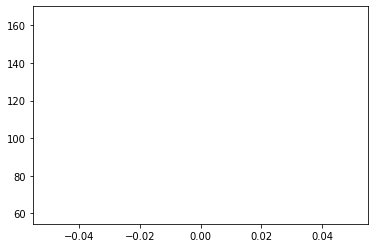

In [15]:
plt.plot(raw[17][0][0:10])
plt.show()


In [58]:
data = raw.get_data()
print(data.shape)

(33, 201118)


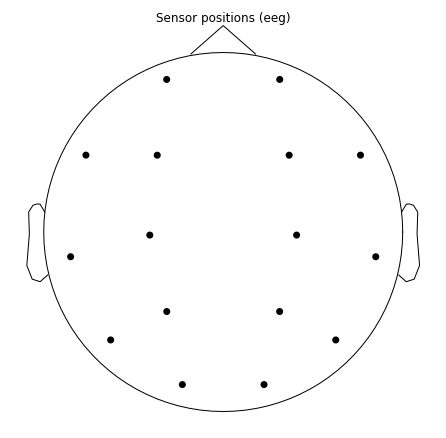

In [60]:
raw.plot_sensors(kind='topomap', ch_type='eeg');

In [61]:
start, stop = 0, 200
data, times = raw[:, start:stop]  # fetch all channels and the first 10 time points
print(data.shape)
print(times.shape)

(33, 200)
(200,)


In [63]:
raw.load_data()  

<RawArray  |  None, n_channels x n_times : 33 x 201118 (1608.9 sec), ~50.7 MB, data loaded>